# <p style="text-align: center;">Minería de Datos - PCA Primera Entrega </p>
### Alumno: Daniel Garnica Sánchez

## Introducción

<p style="text-align: justify;">
Dentro de la estadística existen diversos problemas y dificultades inherentes, de los cuales uno de los principales es la visualización de datos. Generalmente se nos muestran gráficos de relación entre dos variables, esto quiere decir que ésta información la podemos facilmente visualizar en un plano bidimensional (2D), incluso es posible representar información de relación entre tres variables en un plano tridimensional (3D), sin embargo, ¿Que sucede cuando son mas de tres variables, quizas cuatro, cinco, o treinta? Una manera de resolver el problea es con el Análisis de Componentes Principales por sus siglas PCA. </p>

### ¿Qué es PCA?

<p style="text-align: justify;">
El Análisis de Componentes Principales constituye un procedimiento matemático que permite transformar un número de variables posiblemente correlacionadas en un número menor de variables no correlacionadas, llamadas: Componentes Principales. El primer componente o eje absorbe la mayor cantidad de variabilidad posible del conjunto de datos y cada uno de los componentes restantes absorbe el resto. </p>

<p style="text-align: justify;">
Básicamente el método genera un nuevo conjunto de variables, denomiadas Componentes Principales, donde cada componente principal es una combinación lineal de las variables originales.</p>

<p style="text-align: justify;">    
PCA es un método tradicionalmente utilizado para reducir la dimensionalidad de un conjunto de datos. También se utiliza para identificar nuevas variables en un conjunto de datos para una mejor interpretación de los mismos. </p>

## Desarrollo

<p style="text-align: justify;">  
La siguiente entrega desea mostrar el proceso de reducción de dimensionalidad con el procedimiento de PCA a partir de un conjunto de datos con variables de hasta 19 <b>características</b> y una <b>clase</b> </p>

A continuación se mostrará el proceso antes mencionado: 

## Preprocesamiento del archivo

Primeramente se debera obtener la información del archivo correspondiente para manipular los metadatos, haciendo referencia a el numero elementos, atributos y clases.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
archivo = "datos.txt"

In [3]:
df = pd.read_csv(archivo, names = ['A0','A1','A2','A3','A4','A5','A6',
                                   'A7','A8','A9','A10','A11','A12',
                                   'A13','A14','A15','A16','A17','A18', 'Clase'])

### Información Dataset
Tras importar las correspondientes librerías e indicar el archivo que deseamos preprocesar, podemos ver una pequeña parte de nuestro dataset

In [4]:
df.head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,Clase
0,140,125,0,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818,0
1,188,133,0,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817,0
2,105,139,0,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946,0
3,34,137,0,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272,0
4,39,111,0,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773,0


### Estandarización de Información

Dado que PCA produce un subespacio de características que maximiza la varianza a lo largo de los ejes, tiene sentido estandarizar los datos, especialmente si se midieron en diferentes escalas.

A continuación se dividirá la información en dos conjuntos, el de las **clases** y el de la **información**, esto para poder estandarizar la información sin tomar en cuenta la clase del elemento. 

In [5]:
caracteristicas = ['A0','A1','A2','A3','A4','A5','A6','A7','A8','A9'
                   ,'A10','A11','A12','A13','A14','A15','A16','A17','A18']
x = df.loc[:,caracteristicas].values

In [6]:
y = df.loc[:,['Clase']].values

In [7]:
x = StandardScaler().fit_transform(x)

### Visualizacion de Información Estandarizada

A continuación podemos ver la información estandarizada, la cual podemos notar un cambio en los valores de los atributos.

In [8]:
pd.DataFrame(data = x, columns = caracteristicas).head()

,A0,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18
0,-0.058049,-0.285629,0.0,-0.338097,-0.199868,-0.621918,-0.110554,-0.463761,-0.090389,-0.784836,-0.693751,-0.796105,-0.848481,1.511535,-0.712136,-0.070207,-0.849913,0.757935,-0.001032
1,0.598297,-0.153891,0.0,-0.338097,-0.199868,-0.598559,-0.103935,-0.509463,-0.093776,-0.769504,-0.659068,-0.793056,-0.837138,1.680258,-0.772656,-0.106443,-0.831181,0.724362,0.119387
2,-0.536634,-0.055087,0.0,-0.338097,-0.199868,-0.621918,-0.109110,-0.418060,-0.087325,-0.787194,-0.686044,-0.808304,-0.848481,1.607948,-0.772656,-0.052089,-0.856157,0.696035,0.094247
3,-1.507478,-0.088021,0.0,-0.338097,-0.199868,-0.528480,-0.107184,-0.341891,-0.088024,-0.795450,-0.678336,-0.829651,-0.856043,1.764620,-0.857382,-0.043030,-0.849913,0.891177,0.229748
4,-1.439109,-0.516170,0.0,-0.338097,-0.199868,-0.435042,-0.100444,-0.402826,-0.088669,-0.789553,-0.705312,-0.796105,-0.852262,1.451277,-0.687929,-0.061148,-0.846791,0.840188,-0.034012


### Proyección de datos con PCA

Tras haber estandarizado nuestro dataset podemos proceder a realizar PCA, donde indicamos el numero de componentes que deseamos, para posteriormente visualizar la información en manera gráfica.

In [9]:
pca = PCA(n_components = 2)

In [10]:
componentesPrincipales = pca.fit_transform(x)

In [11]:
principalDf = pd.DataFrame(data = componentesPrincipales, columns = ['PC1', 'PC2'])

### Visualización de Componetes Principales

Tras haber aplicado PCA en nuestro dataset, podemos ver el numero de componentes principales mostrandonos como las dimensiones han sido reducidas.

In [12]:
principalDf.head(5)

,PC1,PC2
0,-2.299677,-0.343837
1,-2.371925,-0.403867
2,-2.389590,-0.266572
3,-2.514506,-0.096834
4,-2.236746,-0.124341


De la misma manera visualizamos la información del nuestro conjunto con la información de las clases. Cabe recalcar que a la información de las clases **no** se ha estandarizado **ni** aplicado PCA.

In [13]:
df[['Clase']].head()

,Clase
0,0
1,0
2,0
3,0
4,0


Finalmente podemos agregar la clase a nuestro dataset con dimensionalidad reducida.

In [14]:
finalDf = pd.concat([principalDf, df[['Clase']]], axis = 1)
finalDf.head(5)

,PC1,PC2,Clase
0,-2.299677,-0.343837,0
1,-2.371925,-0.403867,0
2,-2.389590,-0.266572,0
3,-2.514506,-0.096834,0
4,-2.236746,-0.124341,0


### Graficación de la Información

Tras haber reducido las dimensiones de nuestro dataset nos es posible graficarlo en un plano 2D como se muestra a continuación.

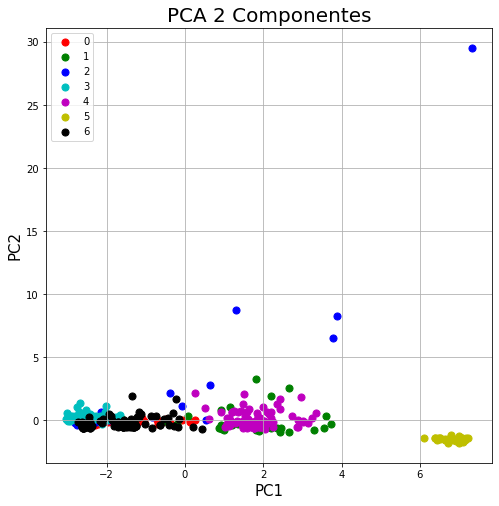

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA 2 Componentes', fontsize = 20)


clases = [0,1,2,3,4,5,6,7]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for clase, color in zip(clases,colors):
    indicesToKeep = finalDf['Clase'] == clase
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(clases)
ax.grid()

## Conclusión 

<p style="text-align: justify;">
El análisis de componentes principales es un método cuantitativamente riguroso para lograr la reducción de dimensionalidad. El método nos brinda información no redundante y la capacidad de graficar de manera mas simple y entendible nuestra información, por lo que en diversas areas del uso de la estadistica y análisis de datos, es un método esencial.  </p>

# Segunda Entrega - Outliers y Árbol de Clasificación

Tras haber hecho el análisis de componentes principales pudimos reducir la dimensionalidad de nuestra información, así como la estandarización de ésta, sin embargo tras haber graficado nuestra información pudimos notar que nuestra información tiene elementos que son anómalos o bien se comportan de manera diferente a la mayoría, estos elementos se les conoce como **outliers**.

A continuación procederemos a tratar con éstos **outliers** los cuales pueden alterar la información que nos interesa. 

## Detección y Eliminación de Outliers

Podemos notar por medio de una gráfica de bigotes que en el caso del Componente Principal 2 existen elementos anómalos que están muy alejados de la media, lo cual no es el caso del CP1

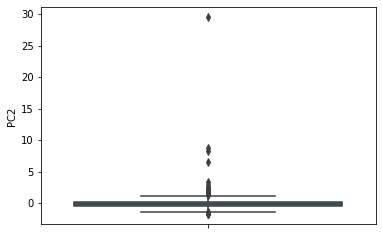

In [17]:
import seaborn as sb
sb.boxplot(y = finalDf['PC2'])

Tras haber identificado el componente principal donde se encuentran nuestros **outliers** procederemos a identificarlos por medio de la regla **IQR 1.5** donde IQR se refiere a "Inter-Quartile Range".
Esta regla o procedimiento consiste en identificar el límite inferior y el límite superior de nuestra información para posteriormente eliminar los elementos fuera de éstos límites. 

In [18]:
def outlierTratamiento(columna):
    sorted(columna)
    Q1,Q3 = np.percentile(columna , [25,75])
    IQR = Q3 - Q1
    rangoInferior = Q1 - (1.5 * IQR)
    rangoSuperior = Q3 + (1.5 * IQR)
    return rangoInferior,rangoSuperior

In [19]:
limiteInf,limiteSup = outlierTratamiento(finalDf.PC2)
print(limiteInf, limiteSup)

-1.467193200512753 1.1785539827654936


Una vez identificados nuestros límites podemos visualizar los elementos que están fuera de éstos.

In [20]:
finalDf[(finalDf.PC2 < limiteInf) | (finalDf.PC2 > limiteSup)].head()

,PC1,PC2,Clase
30,7.088319,-1.560816,5
31,6.653630,-1.589645,5
32,6.754232,-1.498079,5
34,7.097352,-1.683036,5
35,7.072242,-1.571110,5


Tras detectar los elementos que se encuentran fuera de los ímites establecidos procederemos a eliminarlos.

In [21]:
dataFinal = finalDf
dataFinal.drop(dataFinal[(dataFinal.PC2 < limiteInf) | (dataFinal.PC2 > limiteSup)].index , inplace=True)

Tras eliminar los outliers que se encontraban en nuestra información podemos notar que nuestra gráfica despliega los datos de una manera normal o de la manera esperada.

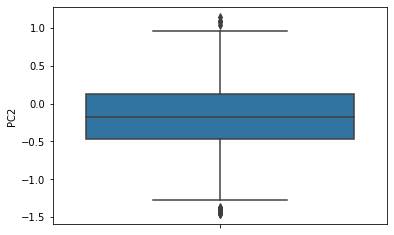

In [22]:
sb.boxplot(y = finalDf['PC2'])

Una vez eliminados los outliers podemos asegurar que nuestra información está límpia, de tal manera que al volver a desplegar nuestra información en una gráfica podemos notar una dispersión mas uniforme y sin elementos extremadamente alejados del resto.

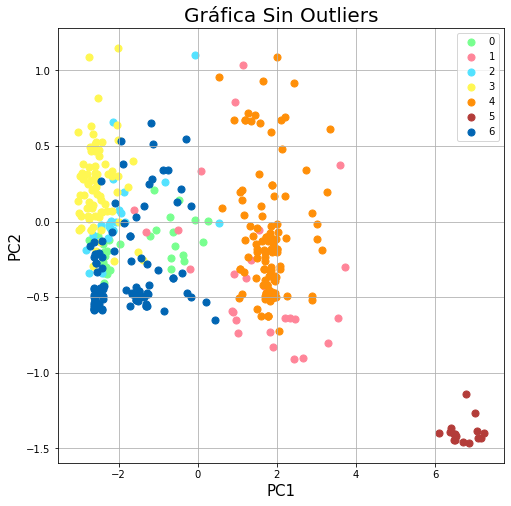

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('Gráfica Sin Outliers', fontsize = 20)


clases = [0,1,2,3,4,5,6,7]
colors = ['#78FF8F', '#FF8599', '#53E2FF', '#FFF752', '#FF8F08', '#B33C39', '#0165B3']
for clase, color in zip(clases,colors):
    indicesToKeep = dataFinal['Clase'] == clase
    ax.scatter(dataFinal.loc[indicesToKeep, 'PC1']
               , dataFinal.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(clases)
ax.grid()

In [25]:
X = dataFinal.drop('Clase', 1)
Y = dataFinal['Clase']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y)

In [27]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [28]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("arbol_decision")

'arbol_decision.pdf'

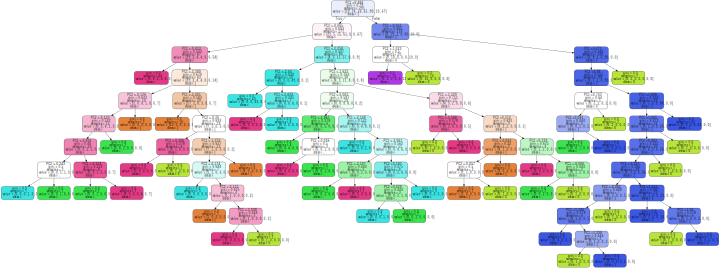

In [29]:
import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=['PC1', 'PC2'],  
                      class_names=str([0, 1, 2, 3, 4, 5, 6]),  
                      filled=True, rounded=True,  
                      special_characters=True)  

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size('"10,10!"')
pydot_graph.write_png('arbol_decision.png')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

In [30]:
explained_variance = pca.explained_variance_ratio_

explained_variance_total = 0
i = 1
for element in explained_variance:
    print("PC" + str(i) + ": " + "{:.3f}".format(element))
    explained_variance_total += element
    i += 1

explained_variance_total *= 100
print("Total: " + "{:.2f}%".format(explained_variance_total))

PC1: 0.414
PC2: 0.166
Total: 57.95%


In [31]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Componentes Principales ocupados: 2 \n")
print("Varianza Explicada: " + "{:.4f}%\n".format(explained_variance_total))
print('Precición de clasificación: ' + "{:.4f}%\n".format(accuracy_score(y_test, y_pred)*100))

Componentes Principales ocupados: 2 

Varianza Explicada: 57.9455%

Precición de clasificación: 74.2268%

